# Assignment 1
Assignments are an individual assessment, you should not work in groups.

You will be turning in:

1. A README.md with all the relevant information. Please see example on Canvas under the Course Docs module.
2. An .ipynb with just your code (show all code necessary for the analysis, but remove superfluous code)
3. A PDF with your Report (see [Google Docs Template](https://docs.google.com/document/d/1W24e0UDCbctlL_yJgpV2fLVtcaLscwf4ptLfgeB8cnk/edit))

All three of these files should be compressed into a singular zip file before submission.

## Data
We're going to be using some [clothing store data](https://github.com/katherinehansen2/CPSC392Hansen/blob/main/data/boutique.csv) to help the company predict how much their customers will spend with them per year.

- `gender`: self-disclosed gender identity, `male`, `female`, `nonbinary` or `other`
- `age`: current age of customer
- `height_cm`: self-reported height converted to centimeters
- `waist_size_cm`: self-reported waist size converted to centimeters
- `inseam_cm`: self-reported inseam (measurement from crotch of pants to floor) converted to centimeters
- `test_group`: whether or not the customer is in an experimental test group that gets special coupons once a month. `0` for no, `1` for yes.
- `salary_self_report_in_k`: self-reported salary of customer, in thousands
- `months_active`: number of months customer has been part of the clothing store's preferred rewards program
- `num_purchases`: the number of purchases the customer has made (a purchase is a single transaction that could include multiple items)
- `amount_spent_annual`: the average amount the customer has spent at the store per year
- `year`: the year the data was collected


## 1. Modeling
- Drop Missing Values and Reset Indices if needed.
- Using *Train-Test-Split Model Validation* with an 80/20 split and `sklearn` build **two** models (a Linear And Polynomial Regression) that predict the average amount the customer spends in a year using all the other variables.
- Z-score continuous/interval variables, and One Hot Encode categorical variables (when needed) before fitting your models.
- Try both a typical **Linear Regression** model and a **Polynomial Regression** model (using `PolynomialFeatures()`)
- Once the model is trained, calculate the *MSE, MAE, and $R^2$* for both the training and testing sets of both models.

## 2. Graphs
Choose 2 of the following bullet points to answer. Build at *least* one ggplot to answer each question (you can also do other calculations in addition), and write a detailed written answer based on the graph and calculations in your report (below). You do not NEED to use your model from part 1 for these questions, they can be purely descriptive. Be sure to clearly indicate which questions you are answering

1. Does being in the experimental `test_group` actually increase the amount a customer spends at the store? Is this relationship different for the different genders?
2. Does making more money (salary) tend to increase the number of purchases someone makes? Does it increase the total amount spent?
3. In which year did the store's *customers* make the most money? Were the store's sales highest in those years?
4. People who are not your "average" size often find it difficult to buy clothes in traditional stores. Is there a relationship between inseam and amount spent in the store annually? Is there a relationship between height and amount spent in the store annually?
5. In this dataset, is there a relationship between salary and height? Is it different for the different genders?
6. The store is interested in whether their customer base has changed over time. Present the minimum, maximum, and average height, waist size, and inseam for each year.


For all ggplots, make sure you make changes so that the data viz is effective, clear, and does not contain distracting elements. Graphs will be graded both on correctness (did you plot the right thing?) as well as on effectiveness (does this graph thoughtfully demonstrate the principles we learned in our data viz lectures?). You should be aiming to make graphs that fall into the "good" category.

## 3. Report

[TEMPLATE HERE](https://docs.google.com/document/d/1W24e0UDCbctlL_yJgpV2fLVtcaLscwf4ptLfgeB8cnk/edit)

Your Technical Report is a way to practice presenting and formatting your results like you would in industry. Make sure your report is clear, and explains things clearly. Your technical report will be scored on the quality of the content and the quality of the writing. Write a report that has the following sections:

1. **Introduction**: description of the problem (e.g. what are you predicting? what variables do you have available? How might this model be useful if you are successful?). You should end with a sentence or two about what the impact of these models could have.

2. **Methods**: describe your models in detail (as if explaining them to the store's CEO), as well as any pre-processing you had to do to the data.

3. **Results**: How well did your model perform according to the various metrics. Was the model overfit? How can you tell? What do those performance metrics tell you about the model? Did you need `PolynomialFeatures` (which includes both ploynomial features and interactions)?  How much do you trust the results of your model (in other words, would you be confident telling the store that they should use the model? Why or why not? Are there any caveats you'd give them?) Also answer the two questions you chose from part 2 above. Include the image, a caption as well as your written answer.

4. **Discussion/Reflection**: A few sentences about what you learned from performing these analyses, and at least one suggestion for what you'd add or do differently if you were to perform this analysis again in the future.

In [1]:
############## MODELING ##############
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

df = pd.read_csv('https://raw.githubusercontent.com/katherinehansen2/CPSC392Hansen/refs/heads/main/data/boutique.csv')

df = df.dropna().reset_index(drop=True)

X = df.drop(['amount_spent_annual', 'year'], axis=1)
y = df['amount_spent_annual']

categorical_cols = ['gender', 'test_group']
continuous_cols = ['age', 'height_cm', 'waist_size_cm', 'inseam_cm', 'salary_self_report_in_k', 'months_active', 'num_purchases']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), continuous_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('model', LinearRegression())])

linear_pipeline.fit(X_train, y_train)

y_train_pred_linear = linear_pipeline.predict(X_train)
y_test_pred_linear = linear_pipeline.predict(X_test)

mse_train_linear = mean_squared_error(y_train, y_train_pred_linear)
mse_test_linear = mean_squared_error(y_test, y_test_pred_linear)
mae_train_linear = mean_absolute_error(y_train, y_train_pred_linear)
mae_test_linear = mean_absolute_error(y_test, y_test_pred_linear)
r2_train_linear = r2_score(y_train, y_train_pred_linear)
r2_test_linear = r2_score(y_test, y_test_pred_linear)

print(f"Linear Regression Metrics:\n"
      f"Train MSE: {mse_train_linear}, Test MSE: {mse_test_linear}\n"
      f"Train MAE: {mae_train_linear}, Test MAE: {mae_test_linear}\n"
      f"Train R2: {r2_train_linear}, Test R2: {r2_test_linear}\n")

polynomial_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                       ('poly', PolynomialFeatures(degree=2)),
                                       ('model', LinearRegression())])

polynomial_pipeline.fit(X_train, y_train)

y_train_pred_poly = polynomial_pipeline.predict(X_train)
y_test_pred_poly = polynomial_pipeline.predict(X_test)

mse_train_poly = mean_squared_error(y_train, y_train_pred_poly)
mse_test_poly = mean_squared_error(y_test, y_test_pred_poly)
mae_train_poly = mean_absolute_error(y_train, y_train_pred_poly)
mae_test_poly = mean_absolute_error(y_test, y_test_pred_poly)
r2_train_poly = r2_score(y_train, y_train_pred_poly)
r2_test_poly = r2_score(y_test, y_test_pred_poly)

print(f"Polynomial Regression Metrics:\n"
      f"Train MSE: {mse_train_poly}, Test MSE: {mse_test_poly}\n"
      f"Train MAE: {mae_train_poly}, Test MAE: {mae_test_poly}\n"
      f"Train R2: {r2_train_poly}, Test R2: {r2_test_poly}\n")


Linear Regression Metrics:
Train MSE: 15386.29827459244, Test MSE: 15352.034869418652
Train MAE: 97.90476606268612, Test MAE: 97.86395438029875
Train R2: 0.4308861412733169, Test R2: 0.44377675401202676

Polynomial Regression Metrics:
Train MSE: 5513.36589926792, Test MSE: 5550.400923735554
Train MAE: 59.643836937869075, Test MAE: 60.05339548849415
Train R2: 0.7960696663026579, Test R2: 0.7989020970448237



<ipython-input-2-6e3a837a14af>:17: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


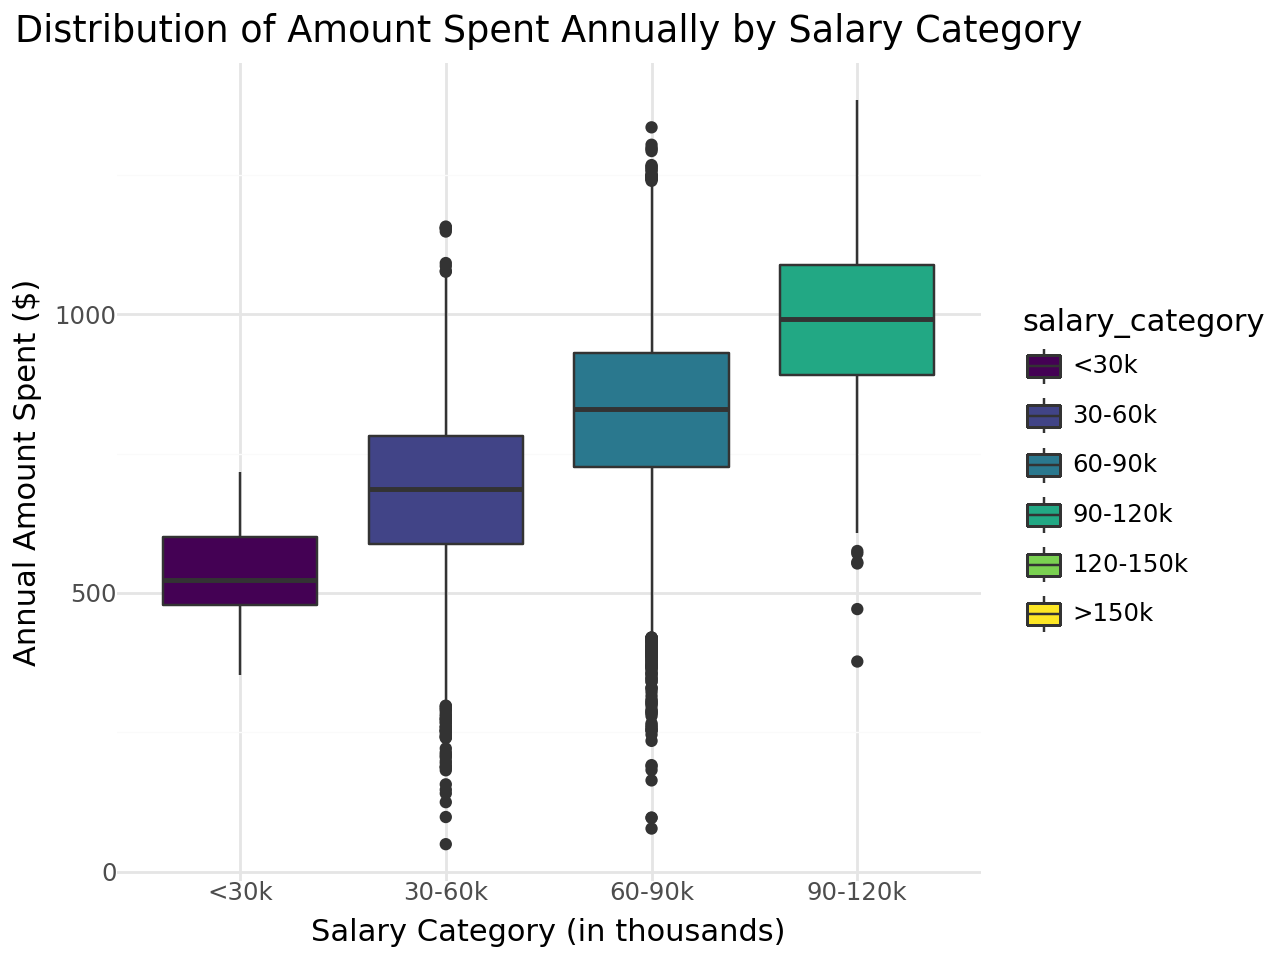

<ipython-input-2-6e3a837a14af>:28: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


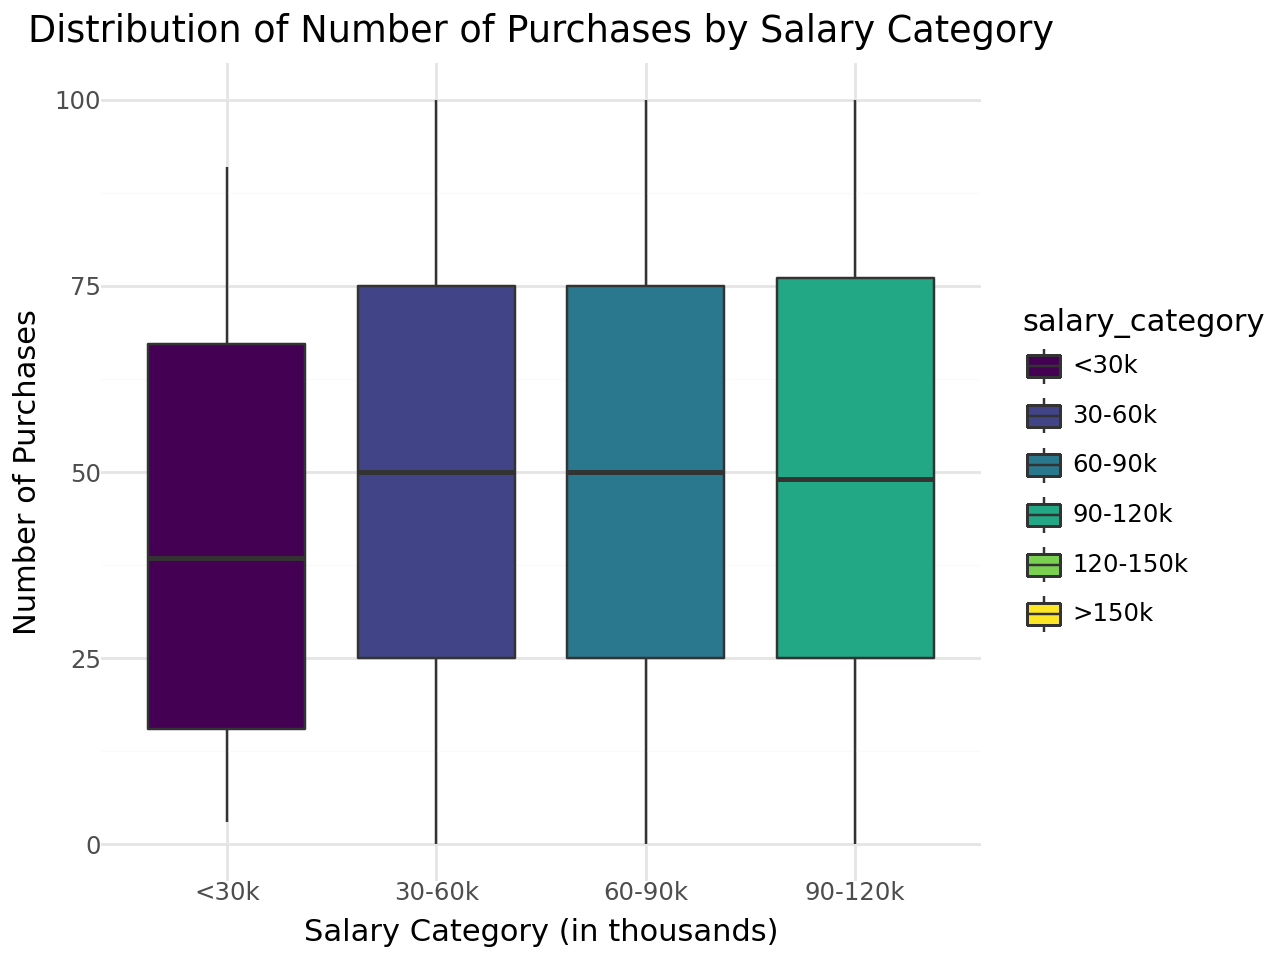

In [2]:
############## GRAPHS ##############
import pandas as pd
from plotnine import *

############## Question 2 ##############
df['salary_category'] = pd.cut(df['salary_self_report_in_k'], bins=[0, 30, 60, 90, 120, 150, float('inf')],
                                labels=['<30k', '30-60k', '60-90k', '90-120k', '120-150k', '>150k'])

boxplot_spent = (
    ggplot(df, aes(x='salary_category', y='amount_spent_annual', fill='salary_category')) +
    geom_boxplot() +
    labs(title='Distribution of Amount Spent Annually by Salary Category',
         x='Salary Category (in thousands)',
         y='Annual Amount Spent ($)') +
    theme_minimal()
)
print(boxplot_spent)

boxplot_purchases = (
    ggplot(df, aes(x='salary_category', y='num_purchases', fill='salary_category')) +
    geom_boxplot() +
    labs(title='Distribution of Number of Purchases by Salary Category',
         x='Salary Category (in thousands)',
         y='Number of Purchases') +
    theme_minimal()
)

print(boxplot_purchases)

<ipython-input-3-e6b04395fe73>:22: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


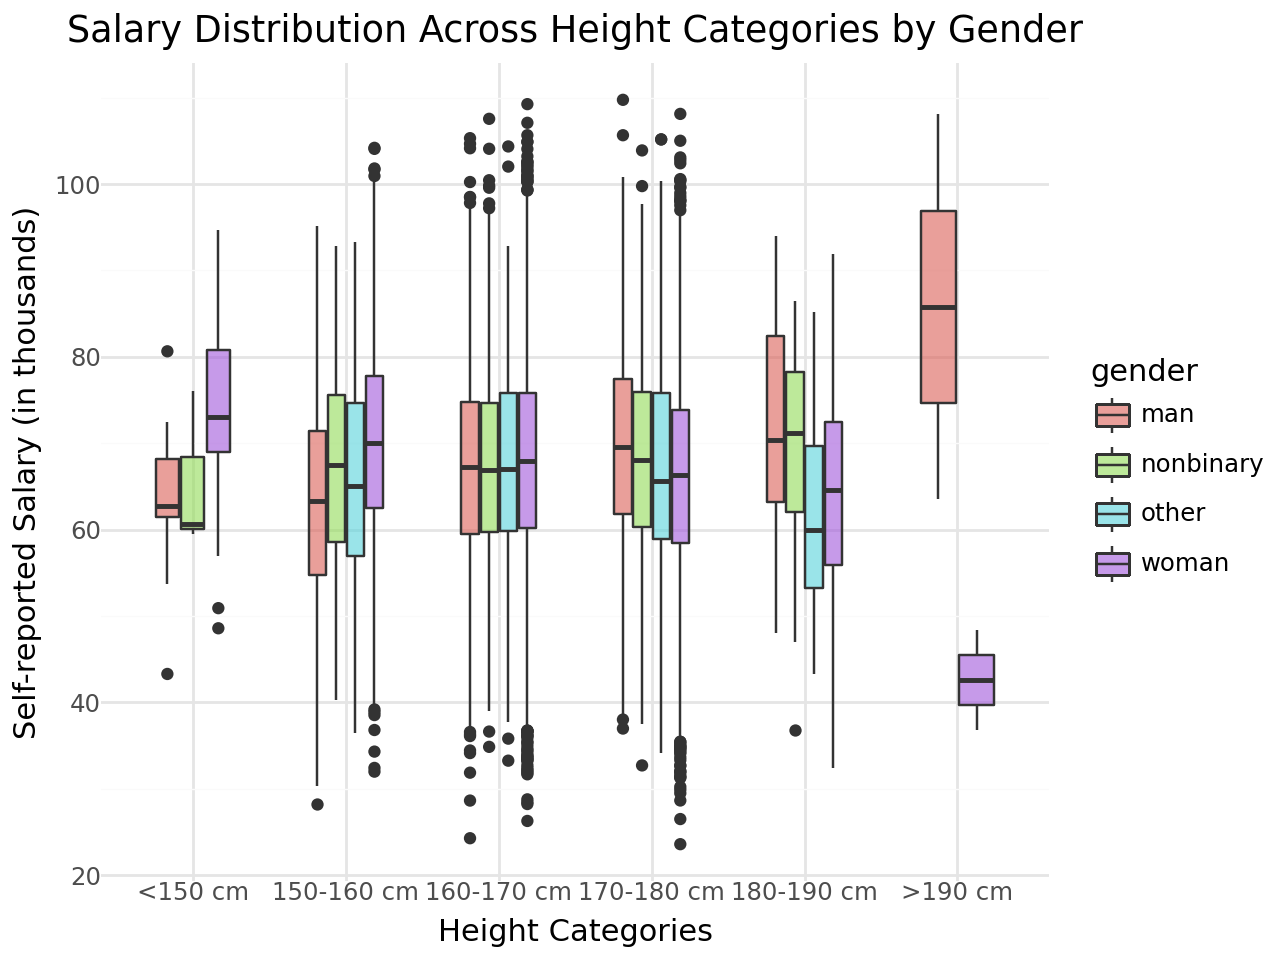

In [3]:
############## GRAPHS ##############


############## Question 5 ##############
df['height_category'] = pd.cut(df['height_cm'],
                                bins=[0, 150, 160, 170, 180, 190, 200],
                                labels=['<150 cm', '150-160 cm', '160-170 cm', '170-180 cm', '180-190 cm', '>190 cm'])

df['height_category'] = pd.cut(df['height_cm'],
                                bins=[0, 150, 160, 170, 180, 190, 200],
                                labels=['<150 cm', '150-160 cm', '160-170 cm', '170-180 cm', '180-190 cm', '>190 cm'])

boxplot_salary_height = (
    ggplot(df, aes(x='height_category', y='salary_self_report_in_k', fill='gender')) +
    geom_boxplot(alpha=0.6, width=0.5) +
    labs(title='Salary Distribution Across Height Categories by Gender',
         x='Height Categories',
         y='Self-reported Salary (in thousands)') +
    theme_minimal()
)

print(boxplot_salary_height)
